<a href="https://colab.research.google.com/github/2eight9/UAS_BDDM/blob/main/Sleep_time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#ANALISIS DATASET

In [2]:
import pandas as pd
file_path = '/content/drive/MyDrive/DATA MINING /sleeptime_prediction_dataset.csv'
df = pd.read_csv(file_path)

In [3]:
# Menampilkan 5 baris pertama
print(df.head())

# Menampilkan informasi kolom
print(df.info())

# Menampilkan deskripsi statistik
print(df.describe())

   WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
0         1.12         0.52       3.29       7.89          216.08   
1         2.85         0.49       4.22       5.03          206.18   
2         2.20         1.81       4.04       9.23           28.73   
3         1.80         0.50       1.62       7.68          276.77   
4         0.47         0.54       1.60       4.94          170.54   

   RelaxationTime  SleepTime  
0            0.75       3.45  
1            0.67       4.88  
2            0.35       3.61  
3            1.21       4.94  
4            0.95       5.50  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  20

In [5]:
# Memeriksa nilai yang hilang
missing_values = df.isnull().sum()
print(missing_values)

WorkoutTime       0
ReadingTime       0
PhoneTime         0
WorkHours         0
CaffeineIntake    0
RelaxationTime    0
SleepTime         0
dtype: int64


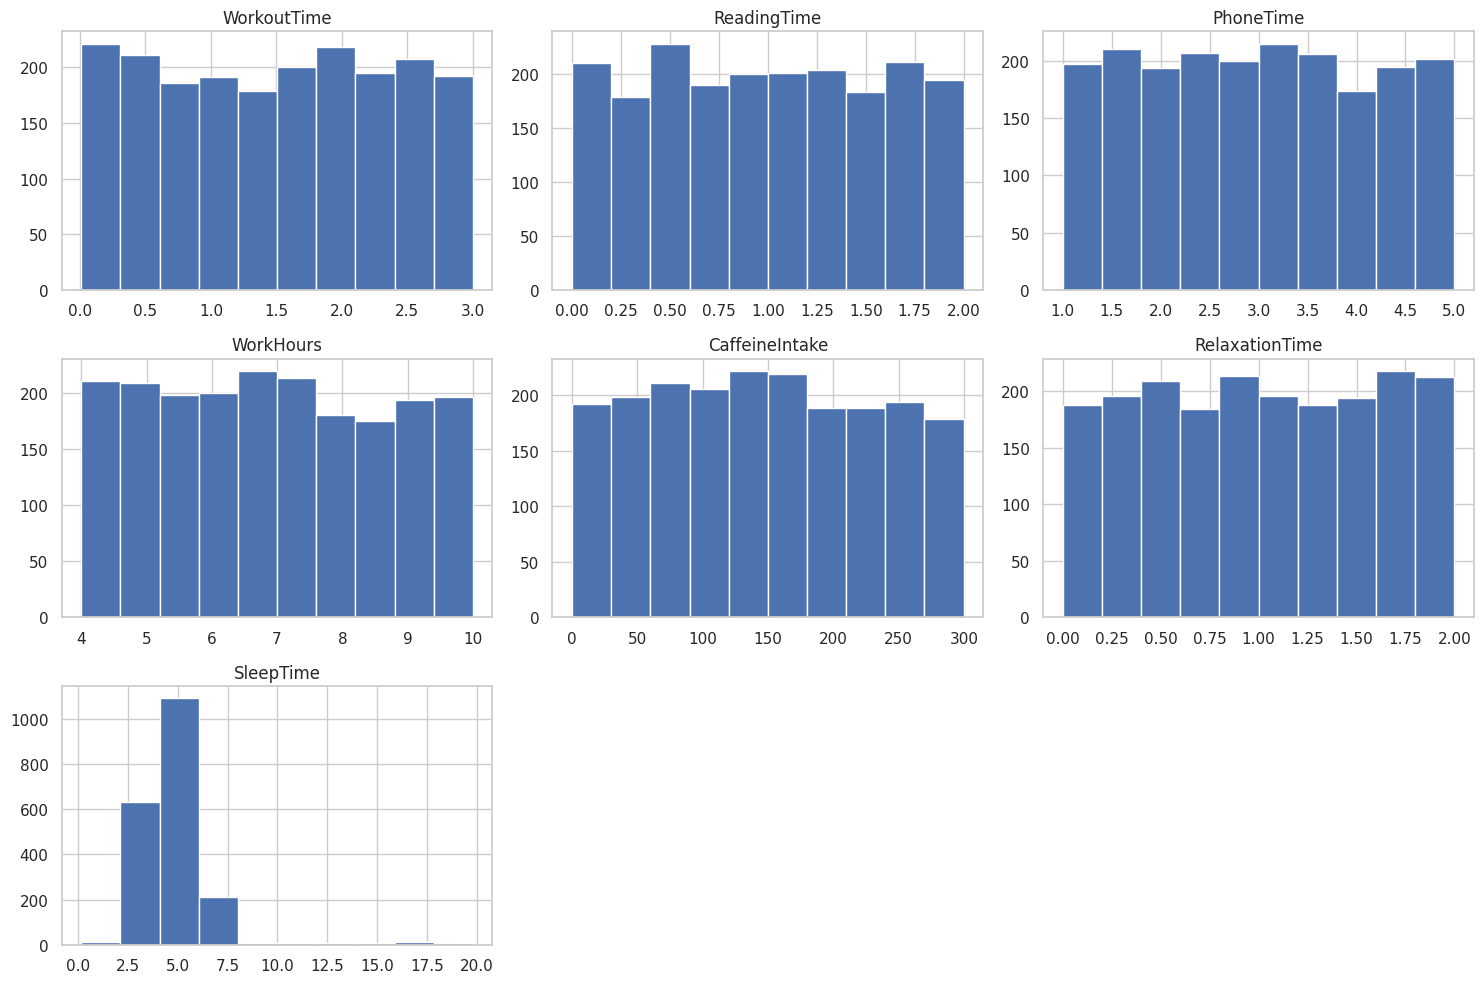

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membuat histogram untuk setiap kolom
df.hist(bins=10, figsize=(15, 10))
plt.tight_layout()
plt.show()

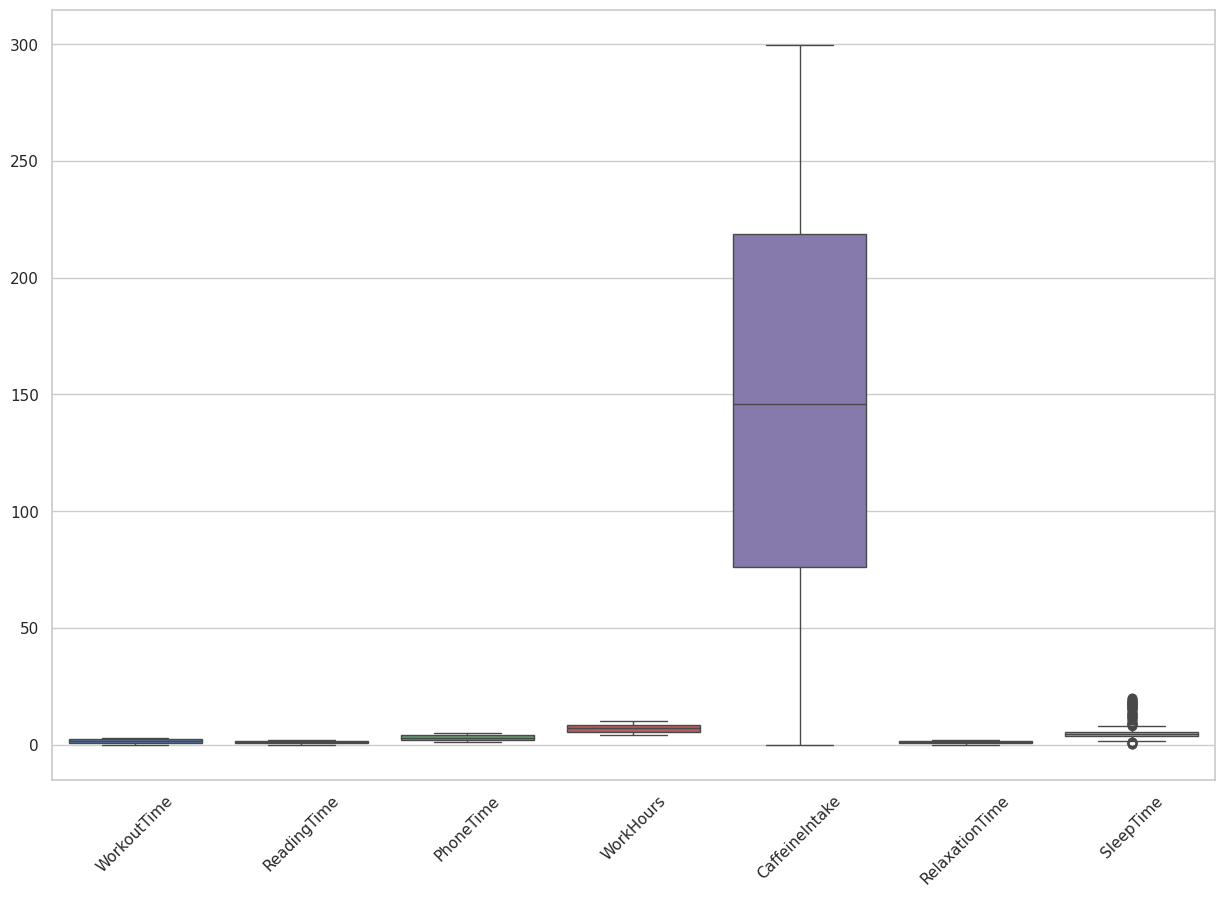

In [6]:
# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

#PREPROCESSING DATA

##Mengatasi Outlier

In [7]:
# Menghitung IQR untuk CaffeineIntake
Q1 = df['CaffeineIntake'].quantile(0.25)
Q3 = df['CaffeineIntake'].quantile(0.75)
IQR = Q3 - Q1

# Menghapus outlier
df_cleaned = df[~((df['CaffeineIntake'] < (Q1 - 1.5 * IQR)) | (df['CaffeineIntake'] > (Q3 + 1.5 * IQR)))]

# Memeriksa outlier di kolom lainnya
# Contoh sederhana untuk kolom lain
for col in df.columns:
    if col != 'CaffeineIntake':  # Lewati kolom yang sudah ditangani
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df_cleaned = df_cleaned[~((df_cleaned[col] < (Q1 - 1.5 * IQR)) | (df_cleaned[col] > (Q3 + 1.5 * IQR)))]

##Mengatasi Missing vallues

In [8]:
# Mengisi missing values
df_cleaned.fillna(df_cleaned.mean(), inplace=True)

##Normalisasi Data

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours', 'CaffeineIntake', 'RelaxationTime', 'SleepTime']
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

##Pembagian Data

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = {
    'WorkoutTime': [1, 2, 3],
    'ReadingTime': [2, 1, 3],
    'CategoryColumn_A': [1, 0, 1],  # Hasil one-hot encoding
    'CategoryColumn_B': [0, 1, 0],
    'TargetColumn': [0, 1, 0]  # Kolom target
}
df_encoded = pd.DataFrame(data)

# Memisahkan fitur dan target
X = df_encoded.drop('TargetColumn', axis=1)  # Fitur
y = df_encoded['TargetColumn']  # Target

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan bentuk data
print("Bentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)
print("Bentuk y_train:", y_train.shape)
print("Bentuk y_test:", y_test.shape)

Bentuk X_train: (2, 4)
Bentuk X_test: (1, 4)
Bentuk y_train: (2,)
Bentuk y_test: (1,)


##Simpan Data Bersih

In [20]:
# Simpan DataFrame yang sudah dibersihkan ke file CSV
df_cleaned.to_csv('/content/drive/MyDrive/DATA MINING /sleeptime_prediction_dataset_cleaned.csv', index=False)

##Eksplorisasi Data dan Lanjutan

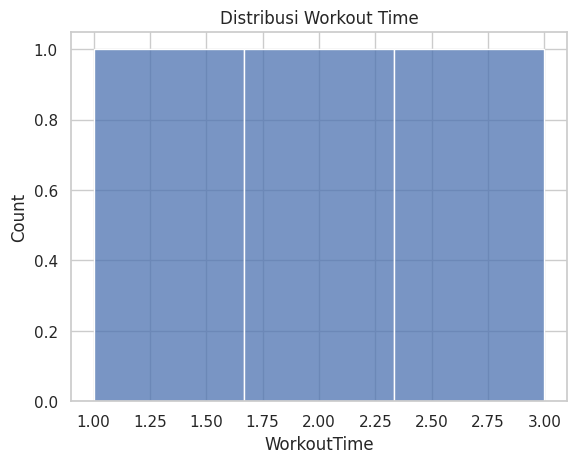

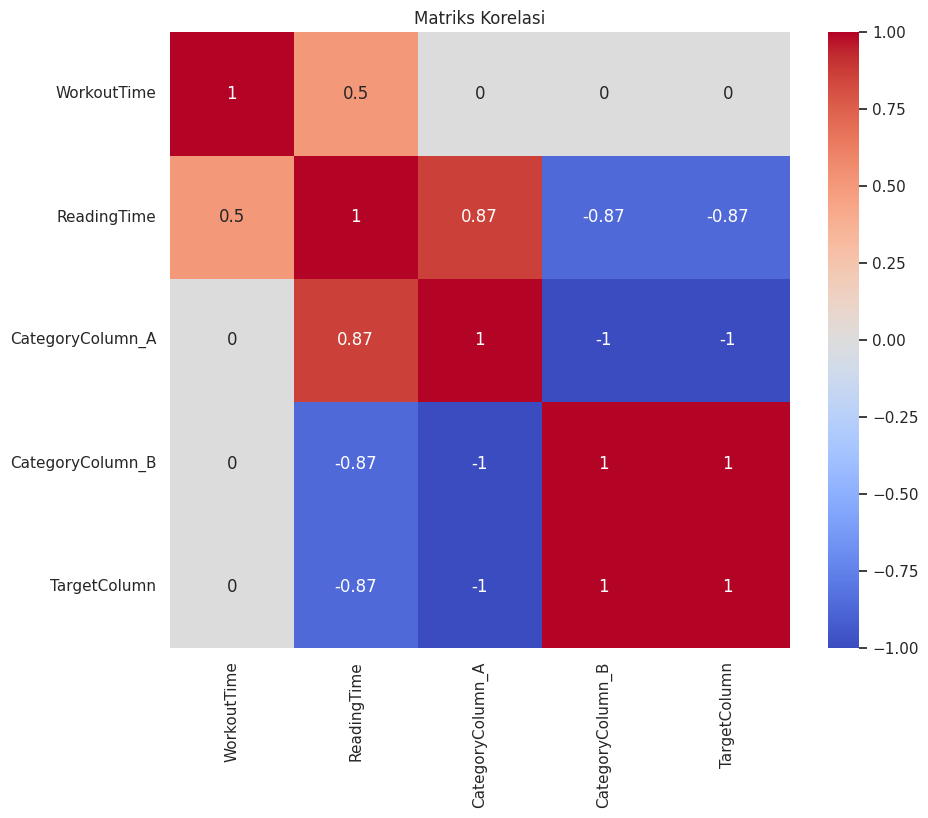

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi fitur
sns.histplot(df_encoded['WorkoutTime'])
plt.title('Distribusi Workout Time')
plt.show()

# Matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

##Featuring Enginering

In [22]:
# Contoh membuat fitur baru
df_encoded['TotalTime'] = df_encoded['WorkoutTime'] + df_encoded['ReadingTime']

##Scalling

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['WorkoutTime', 'ReadingTime', 'TotalTime']  # Tambahkan fitur yang relevan
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

##Menyimpan Data Proses

In [24]:
df_encoded.to_csv('processed_data.csv', index=False)

#EXPLORATORY DATA ANALYSIS

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df_encoded = pd.read_csv('processed_data.csv')

In [27]:
print(df_encoded.head())  # Menampilkan beberapa baris pertama
print(df_encoded.info())  # Memeriksa tipe data dan missing values

   WorkoutTime  ReadingTime  CategoryColumn_A  CategoryColumn_B  TargetColumn  \
0          0.0          0.5                 1                 0             0   
1          0.5          0.0                 0                 1             1   
2          1.0          1.0                 1                 0             0   

   TotalTime  
0        0.0  
1        0.0  
2        1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WorkoutTime       3 non-null      float64
 1   ReadingTime       3 non-null      float64
 2   CategoryColumn_A  3 non-null      int64  
 3   CategoryColumn_B  3 non-null      int64  
 4   TargetColumn      3 non-null      int64  
 5   TotalTime         3 non-null      float64
dtypes: float64(3), int64(3)
memory usage: 276.0 bytes
None


In [28]:
print(df_encoded.head())  # Menampilkan beberapa baris pertama
print(df_encoded.info())  # Memeriksa tipe data dan missing values

   WorkoutTime  ReadingTime  CategoryColumn_A  CategoryColumn_B  TargetColumn  \
0          0.0          0.5                 1                 0             0   
1          0.5          0.0                 0                 1             1   
2          1.0          1.0                 1                 0             0   

   TotalTime  
0        0.0  
1        0.0  
2        1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WorkoutTime       3 non-null      float64
 1   ReadingTime       3 non-null      float64
 2   CategoryColumn_A  3 non-null      int64  
 3   CategoryColumn_B  3 non-null      int64  
 4   TargetColumn      3 non-null      int64  
 5   TotalTime         3 non-null      float64
dtypes: float64(3), int64(3)
memory usage: 276.0 bytes
None


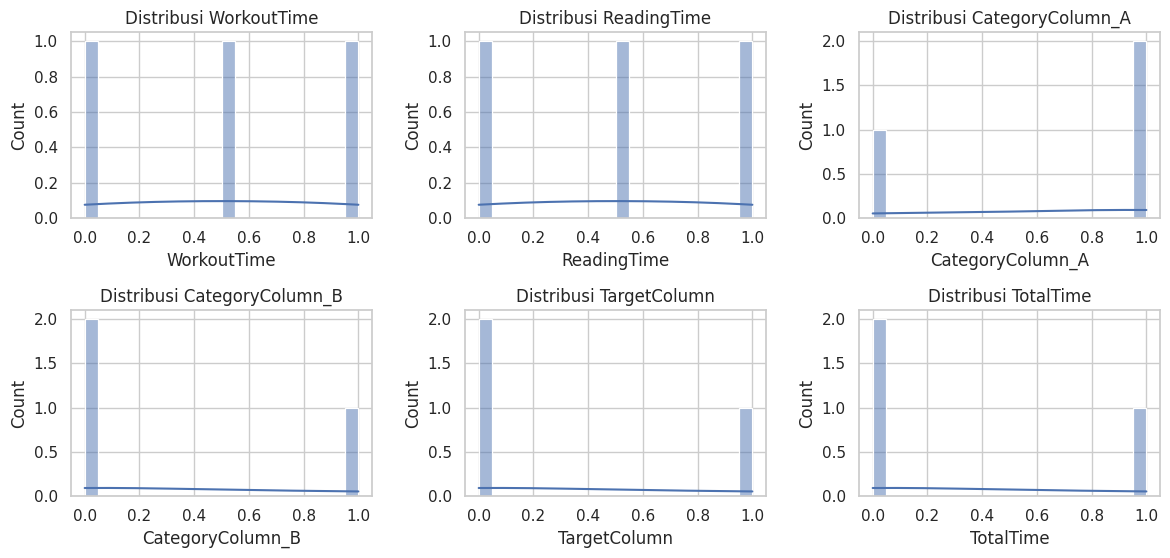

In [29]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_encoded.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)  # Ubah angka sesuai jumlah fitur
    sns.histplot(df_encoded[column], bins=20, kde=True)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

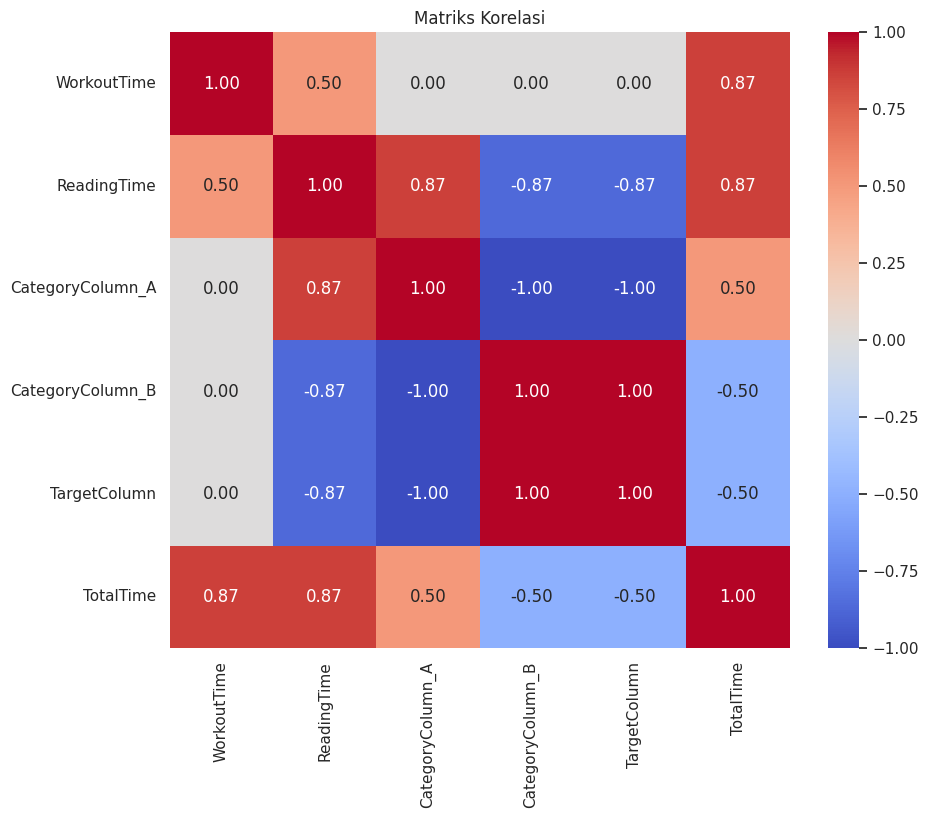

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

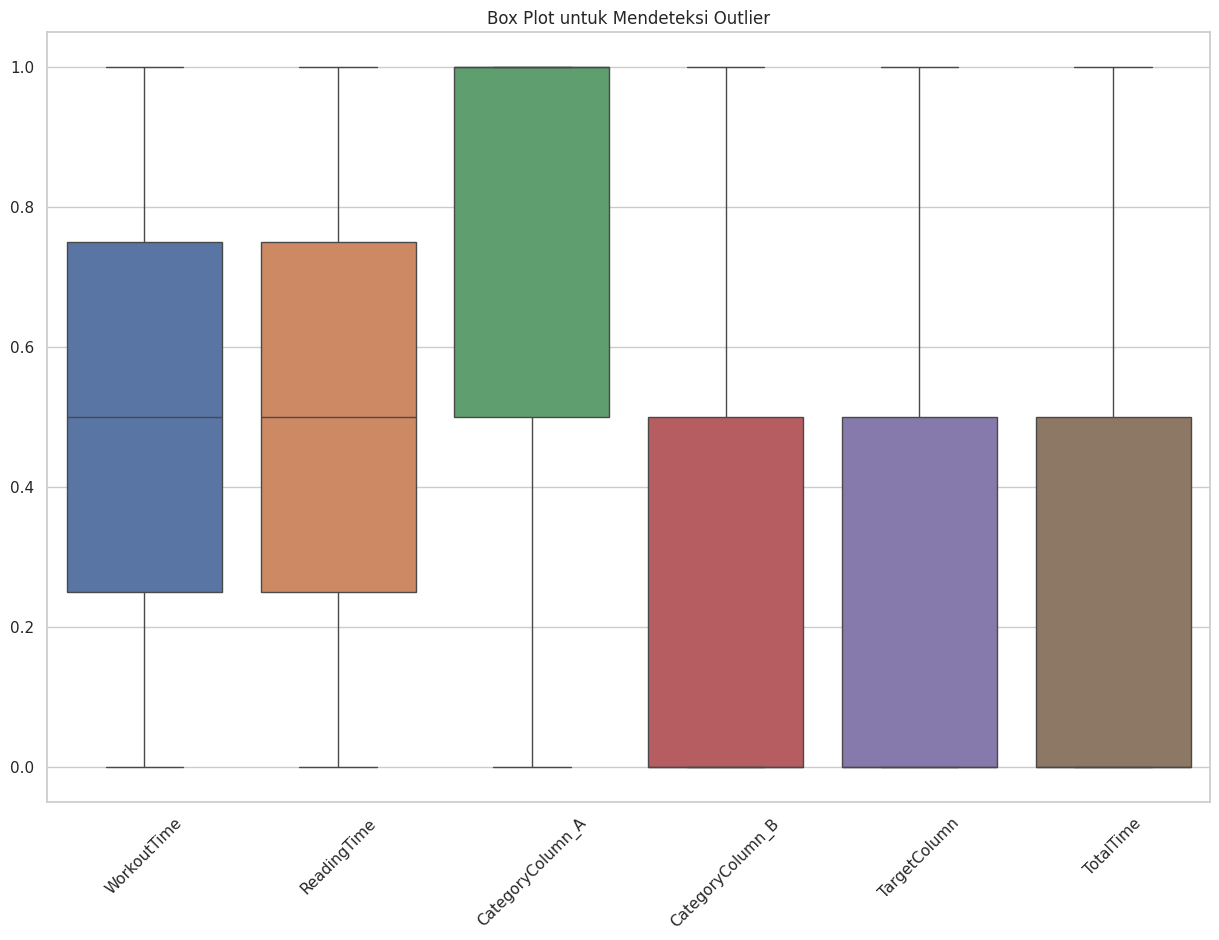

In [31]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_encoded)
plt.xticks(rotation=45)
plt.title('Box Plot untuk Mendeteksi Outlier')
plt.show()

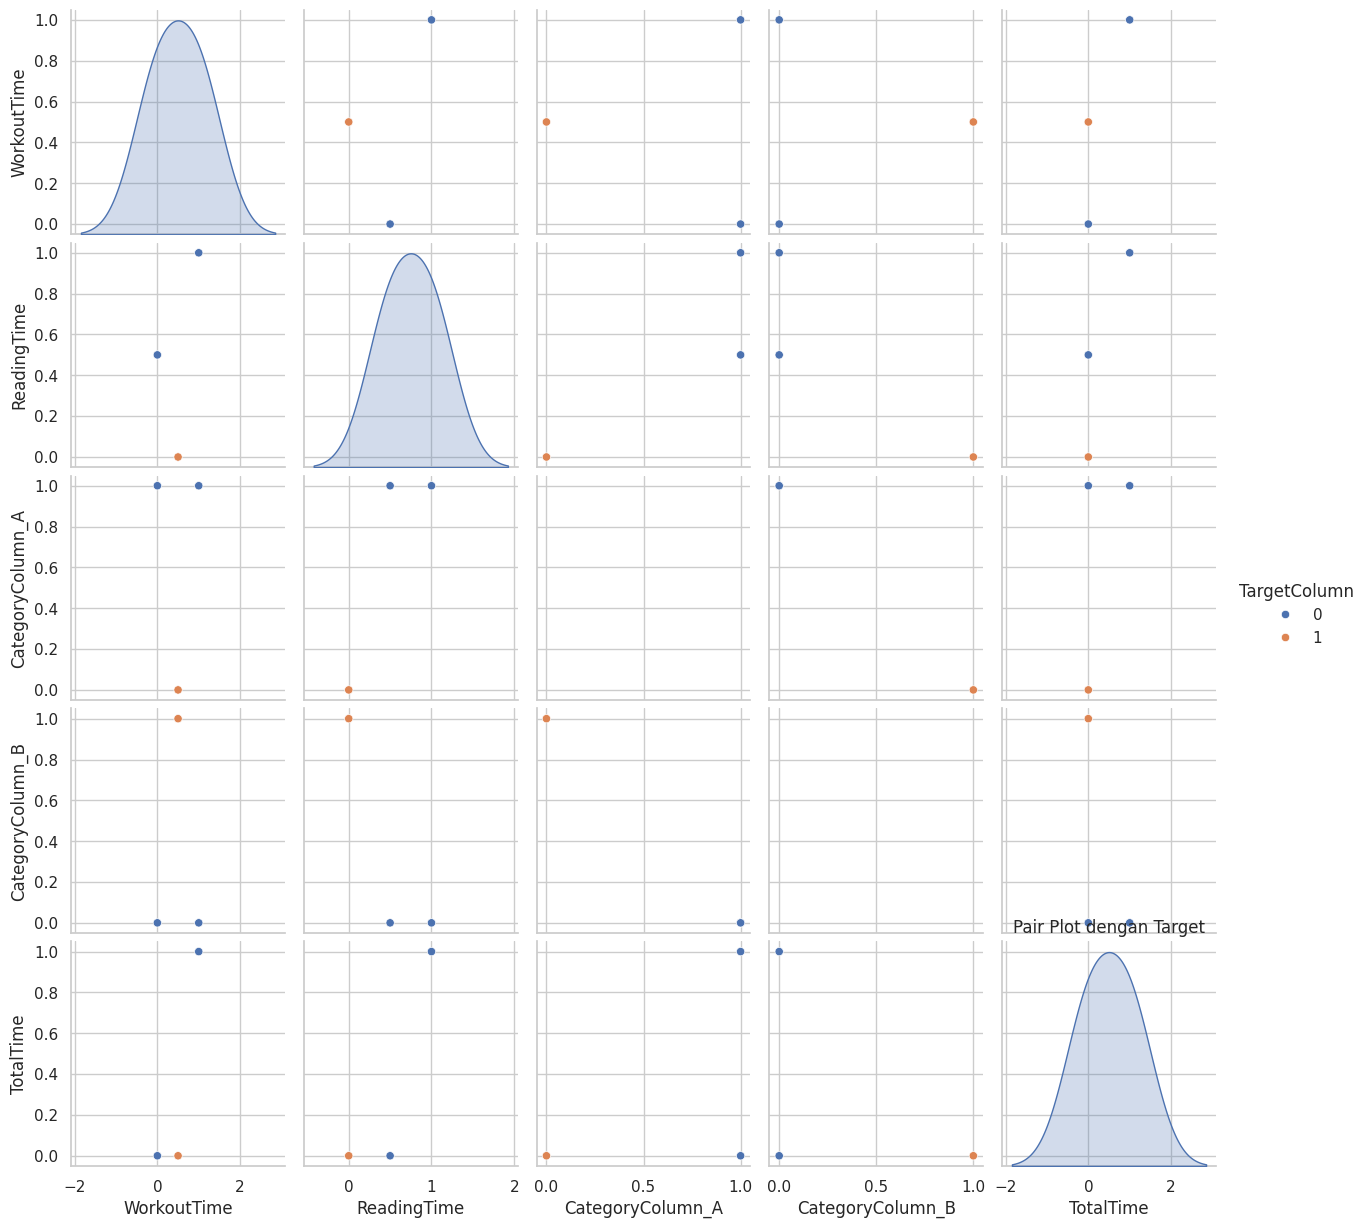

In [32]:
sns.pairplot(df_encoded, hue='TargetColumn')
plt.title('Pair Plot dengan Target')
plt.show()

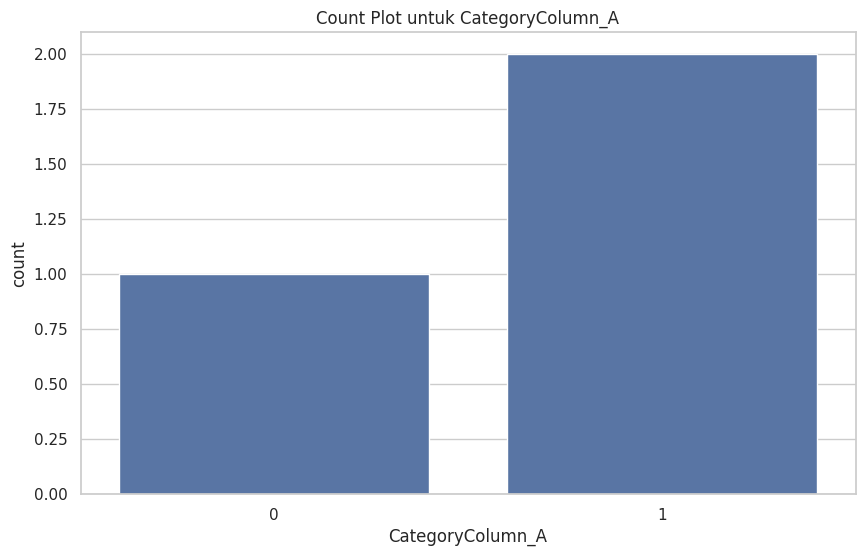

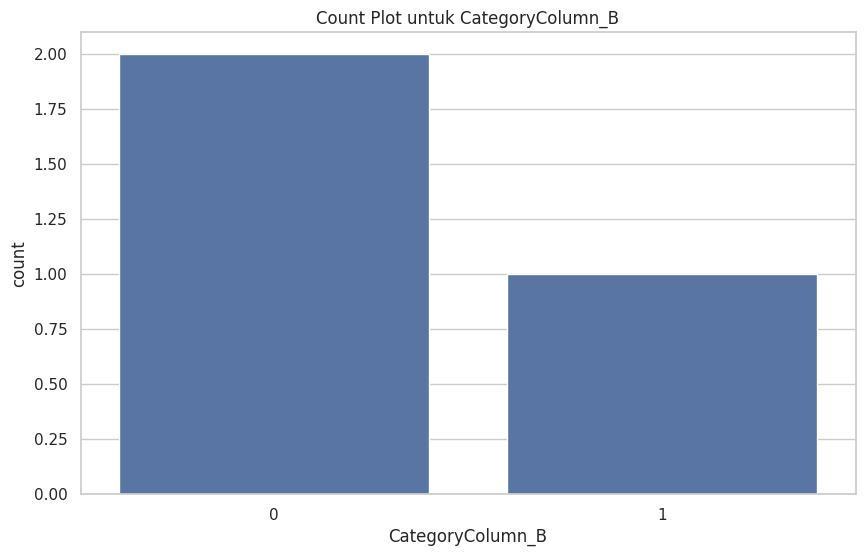

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CategoryColumn_A', data=df_encoded)
plt.title('Count Plot untuk CategoryColumn_A')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='CategoryColumn_B', data=df_encoded)
plt.title('Count Plot untuk CategoryColumn_B')
plt.show()

In [43]:
print(df.columns)

Index(['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours',
       'CaffeineIntake', 'RelaxationTime', 'SleepTime'],
      dtype='object')


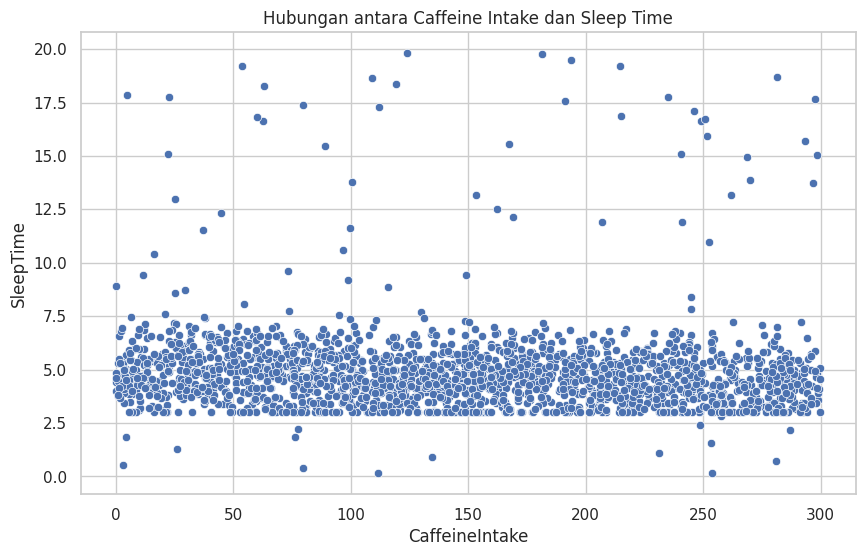

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CaffeineIntake', y='SleepTime', data=df_encoded)
plt.title('Hubungan antara Caffeine Intake dan Sleep Time')
plt.show()

##Analisis Kategorial Lebih Dalam

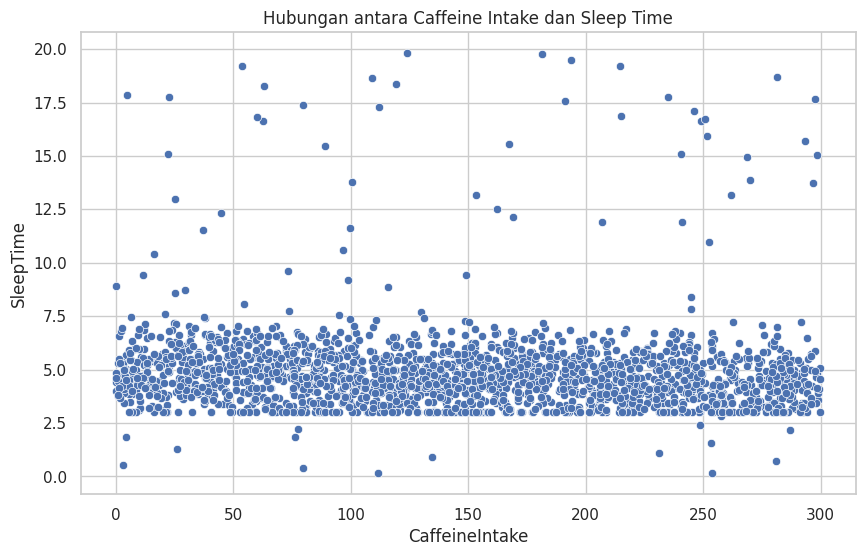

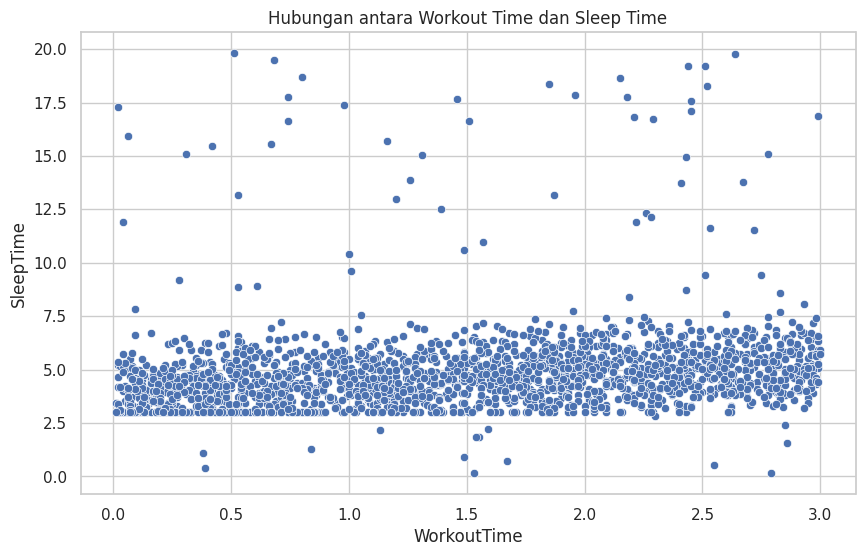

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CaffeineIntake', y='SleepTime', data=df_encoded)
plt.title('Hubungan antara Caffeine Intake dan Sleep Time')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='WorkoutTime', y='SleepTime', data=df_encoded)
plt.title('Hubungan antara Workout Time dan Sleep Time')
plt.show()

#SELEKSI FITUR

In [59]:
# Memeriksa kolom di df_encoded
print(df_encoded.columns)

# Misalkan kolom target yang benar adalah 'SleepTime'
X = df_encoded.drop('SleepTime', axis=1)  # Fitur
y = df_encoded['SleepTime']  # Target

Index(['WorkoutTime', 'ReadingTime', 'CaffeineIntake', 'SleepTime',
       'TotalTime'],
      dtype='object')


In [60]:
# Menghitung matriks korelasi
correlation_matrix = df_encoded.corr()
print(correlation_matrix)


                WorkoutTime  ReadingTime  CaffeineIntake  SleepTime  TotalTime
WorkoutTime        1.000000     0.003660       -0.052671   0.188368   0.835778
ReadingTime        0.003660     1.000000       -0.000996   0.067199   0.552122
CaffeineIntake    -0.052671    -0.000996        1.000000  -0.076992  -0.044462
SleepTime          0.188368     0.067199       -0.076992   1.000000   0.193953
TotalTime          0.835778     0.552122       -0.044462   0.193953   1.000000


In [61]:
# Menentukan ambang batas korelasi
threshold = 0.5  # Misalnya, ambang batas 0.5

In [62]:
# Memilih fitur yang memiliki korelasi lebih dari threshold dengan target
relevant_features = correlation_matrix['SleepTime'][correlation_matrix['SleepTime'].abs() > threshold].index.tolist()
print("Fitur relevan berdasarkan korelasi:", relevant_features)

Fitur relevan berdasarkan korelasi: ['SleepTime']


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Membuat model regresi
model = LinearRegression()

# Menggunakan RFE
rfe = RFE(model, n_features_to_select=3)  # Pilih jumlah fitur yang diinginkan
rfe = rfe.fit(X, y)

# Menampilkan fitur yang terpilih
selected_features = X.columns[rfe.support_]
print("Fitur yang dipilih oleh RFE:", selected_features)

Fitur yang dipilih oleh RFE: Index(['WorkoutTime', 'ReadingTime', 'TotalTime'], dtype='object')


In [65]:
print(y.head())
print(y.dtypes)

0    3.45
1    4.88
2    3.61
3    4.94
4    5.50
Name: SleepTime, dtype: float64
float64


In [66]:
# Mengambil fitur yang terpilih
X_selected = X[selected_features]

# Membagi data menjadi set pelatihan dan set pengujian
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Menampilkan bentuk data
print("Bentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)
print("Bentuk y_train:", y_train.shape)
print("Bentuk y_test:", y_test.shape)

Bentuk X_train: (1600, 3)
Bentuk X_test: (400, 3)
Bentuk y_train: (1600,)
Bentuk y_test: (400,)


In [67]:
# Membangun model
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi nilai
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 5.435906027101962
R^2 Score: 0.03984389091345164


#MODELING

In [80]:
# Import library yang dibutuhkan jika belum diimport
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data yang sudah diproses
df_encoded = pd.read_csv('processed_data.csv')

# Pisahkan fitur (X) dan target (y)
# Use 'TargetColumn' as the target instead of 'SleepTime'
X = df_encoded.drop('TargetColumn', axis=1)
y = df_encoded['TargetColumn']

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Training model
model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.22145328719723184
R-squared: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [84]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

# Membaca data yang sudah diproses
df = pd.read_csv('/content/processed_data.csv')  # Read the processed data into a DataFrame called 'df'

# Periksa nama kolom
print("Kolom dalam DataFrame:", df.columns)

# Menggunakan nama kolom yang benar untuk target
target_column_name = 'TargetColumn'  # Ganti ini sesuai dengan nama kolom target Anda

# Memisahkan fitur dan target
X = df.drop(target_column_name, axis=1)  # Fitur (semua kolom kecuali kolom target)
y = df[target_column_name]  # Variabel target

# Pastikan dataset cukup besar (ubah batasan jika perlu)
if len(df) < 5:  # Ubah menjadi 5 untuk mengizinkan dataset lebih kecil
    print("Warning: Dataset terlalu kecil untuk analisis yang akurat, melanjutkan dengan data yang ada.")

# Seleksi fitur menggunakan RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)  # Pilih jumlah fitur yang diinginkan
rfe.fit(X, y)

# Menampilkan fitur yang terpilih
selected_features = X.columns[rfe.support_]
print("Fitur yang dipilih oleh RFE:", selected_features)

# Mengambil fitur yang terpilih
X_selected = X[selected_features]

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Membangun model
model.fit(X_train, y_train)

# Memprediksi nilai
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)

# Validasi R² Score
if len(y_test) > 1:
    r2 = r2_score(y_test, y_pred)
else:
    r2 = float('nan')  # Set R² ke nan jika tidak cukup data

# Menampilkan hasil evaluasi
print("Mean Squared Error:", mse)
print("R^2 Score:", r2 if len(y_test) > 1 else "Tidak dapat dihitung, kurang dari dua sampel.")

# Jika ukuran set pengujian terlalu kecil, gunakan K-Fold dengan fold yang lebih sedikit
if len(y_test) <= 1:
    kf = KFold(n_splits=2)  # Gunakan 2-fold cross-validation
    scores = []
    for train_index, test_index in kf.split(X_selected):
        X_train_cv, X_test_cv = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_test_cv)
        if len(y_test_cv) > 1:
            scores.append(r2_score(y_test_cv, y_pred_cv))

    if scores:
        print("R^2 Scores dari Cross-Validation:", scores)
        print("R^2 Score rata-rata:", sum(scores) / len(scores))
    else:
        print("Tidak ada skor R^2 yang valid dari cross-validation.")

Kolom dalam DataFrame: Index(['WorkoutTime', 'ReadingTime', 'CategoryColumn_A', 'CategoryColumn_B',
       'TargetColumn', 'TotalTime'],
      dtype='object')
Fitur yang dipilih oleh RFE: Index(['ReadingTime', 'CategoryColumn_A', 'CategoryColumn_B'], dtype='object')
Mean Squared Error: 0.027777777777777804
R^2 Score: Tidak dapat dihitung, kurang dari dua sampel.
R^2 Scores dari Cross-Validation: [-1.0]
R^2 Score rata-rata: -1.0


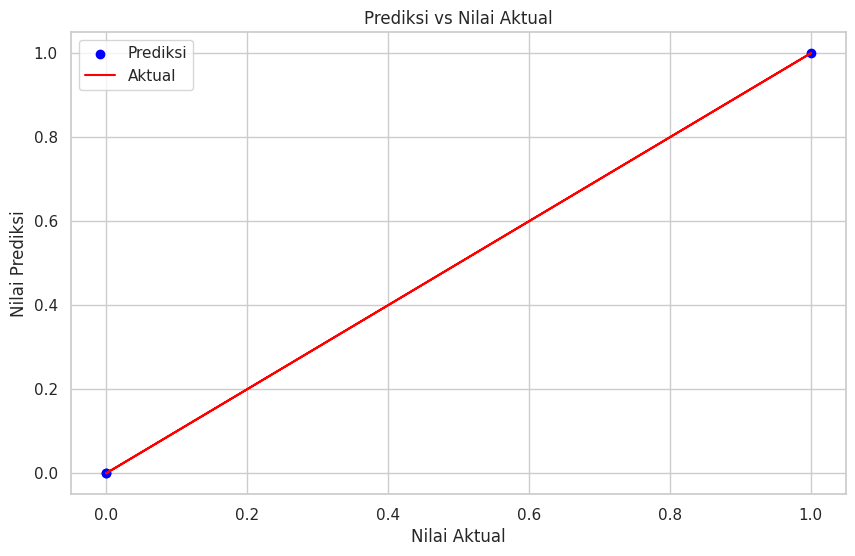

In [88]:
# Membangun model pada seluruh dataset
model.fit(X_selected, y)

# Memprediksi nilai pada seluruh dataset
y_pred = model.predict(X_selected)

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Prediksi')
plt.plot(y, y, color='red', label='Aktual')  # Garis ideal
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi vs Nilai Aktual')
plt.legend()
plt.show()

##HASIL MODELING DAN PERCOBAAN DENGAN DATASET AWAL

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Memuat dataset
data = pd.read_csv('/content/drive/MyDrive/DATA MINING /sleeptime_prediction_dataset.csv')

# Memisahkan fitur dan target
X = data[['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours', 'CaffeineIntake', 'RelaxationTime']]
y = data['SleepTime']  # Target yang ingin diprediksi

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)

# Menampilkan hasil
print("Prediksi:", y_pred)

Prediksi: [6.53902528 3.5469378  5.91287902 6.75679864 3.21906055 4.23300063
 3.4785196  5.86721199 5.65588266 2.51059358 3.58360657 6.77401916
 3.43903467 4.27923392 5.26261665 4.22251175 5.52338264 5.39932282
 5.11035986 4.4678867  5.57168151 5.86012698 6.5768978  6.00082085
 6.10268636 4.23900706 3.77612235 5.43414446 6.52383307 5.40953082
 3.56201937 3.63119723 5.98697569 4.43419936 7.13312007 4.72200633
 5.52453858 4.63661742 3.79658234 5.91869934 3.04197048 3.05820686
 6.07515575 3.46049496 3.29384785 5.28340747 5.46322529 3.92958439
 5.18442633 4.77753819 5.57539722 6.06865474 4.94253163 4.81777757
 4.04874279 5.93163486 4.90540903 4.72162547 5.63887918 5.31471821
 4.3294562  4.4925663  3.00351823 6.17133259 3.68310402 4.22435131
 3.95762564 6.2404083  4.16256017 3.64063313 4.90983229 5.83708801
 6.64731476 6.12681545 4.36391726 5.61931067 4.08377786 2.46014326
 5.15635601 4.41113601 5.46410088 3.91571907 3.70589693 3.99636547
 4.93347526 6.05233262 3.28091069 4.95916274 3.54221

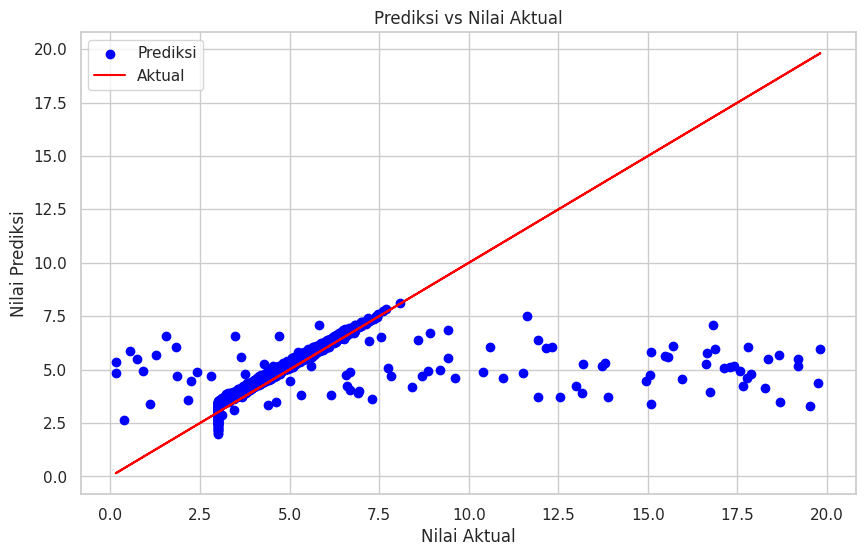

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Contoh model, ganti sesuai kebutuhan

# Memuat dataset
data = pd.read_csv('/content/drive/MyDrive/DATA MINING /sleeptime_prediction_dataset.csv')

# Memisahkan fitur dan target
X = data[['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours', 'CaffeineIntake', 'RelaxationTime']]
y = data['SleepTime']  # Target yang ingin diprediksi

# Membangun model pada seluruh dataset
model = LinearRegression()  # Ganti dengan model yang Anda gunakan
model.fit(X, y)

# Memprediksi nilai pada seluruh dataset
y_pred = model.predict(X)

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Prediksi')
plt.plot(y, y, color='red', label='Aktual')  # Garis ideal
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi vs Nilai Aktual')
plt.legend()
plt.show()